In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data = pd.read_excel('Actual_generation_202401010000_202402212359_Hour.xlsx')
data.head()

/home/waminion013/.local/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Data category: Actual generation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Region: DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Period: Jan 1, 2024, 12:00 AM - Feb 21, 2024, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"State: Feb 21, 2024, 3:37 PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(c) Bundesnetzagentur | SMARD.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Resolution: Hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(1257, 15)

In [21]:
data.head(8)

,Data category: Actual generation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Region: DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Period: Jan 1, 2024, 12:00 AM - Feb 21, 2024, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"State: Feb 21, 2024, 3:37 PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(c) Bundesnetzagentur | SMARD.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Resolution: Hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Calculated resolution: Nuclear, Biomass, Wind ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Original resolution:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [25]:
# Cleaning the data by removing non-data rows and setting the appropriate header
data_cleaned = data.iloc[8:].copy()
data_cleaned.columns = data_cleaned.iloc[0]
data_cleaned = data_cleaned[1:]  # Dropping the row used as header

# Resetting the index for the cleaned data
data_cleaned.reset_index(drop=True, inplace=True)

# Checking the cleaned data
data_cleaned.head()


8,Date,Start,End,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
0,"Jan 1, 2024",12:00 AM,1:00 AM,4631.75,1796.5,5680.5,29521.5,0,93,0,3391.75,1860.75,2731.25,620.75,1134
1,"Jan 1, 2024",1:00 AM,2:00 AM,4571.25,1798.5,5343.25,29614.75,0,93,0,3372.75,1854.75,2662,405.5,1119.25
2,"Jan 1, 2024",2:00 AM,3:00 AM,4528.75,1821.75,5187.25,29643,0,93,0,3373.5,1828.75,2689.5,374.75,1111.75
3,"Jan 1, 2024",3:00 AM,4:00 AM,4467,1828.75,4673.5,29215.25,0,93,0,3393,1817.5,2711.5,331.75,1122.25
4,"Jan 1, 2024",4:00 AM,5:00 AM,4427.5,1856.25,4438.5,29284,0,94.75,0,3393.75,1832.75,2694.25,178.75,1113


In [6]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1248 non-null   object
 1   Start                       1248 non-null   object
 2   End                         1248 non-null   object
 3   Biomass [MWh]               1248 non-null   object
 4   Hydropower [MWh]            1248 non-null   object
 5   Wind offshore [MWh]         1248 non-null   object
 6   Wind onshore [MWh]          1248 non-null   object
 7   Photovoltaics [MWh]         1248 non-null   object
 8   Other renewable [MWh]       1248 non-null   object
 9   Nuclear [MWh]               1248 non-null   object
 10  Lignite [MWh]               1248 non-null   object
 11  Hard coal [MWh]             1248 non-null   object
 12  Fossil gas [MWh]            1248 non-null   object
 13  Hydro pumped storage [MWh]  1248 non-null   obje

In [9]:
# checking for missing values
missing_values = data_cleaned.isnull().sum()
missing_values

8
Date                          0
Start                         0
End                           0
Biomass [MWh]                 0
Hydropower [MWh]              0
Wind offshore [MWh]           0
Wind onshore [MWh]            0
Photovoltaics [MWh]           0
Other renewable [MWh]         0
Nuclear [MWh]                 0
Lignite [MWh]                 0
Hard coal [MWh]               0
Fossil gas [MWh]              0
Hydro pumped storage [MWh]    0
Other conventional [MWh]      0
dtype: int64

In [10]:
# Converting the 'Date', 'Start', and 'End' columns to datetime objects
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%b %d, %Y')
data_cleaned['Start'] = pd.to_datetime(data_cleaned['Start'], format='%I:%M %p').dt.time
data_cleaned['End'] = pd.to_datetime(data_cleaned['End'], format='%I:%M %p').dt.time

# Converting the energy generation columns to numeric values
energy_columns = data_cleaned.columns[3:]
data_cleaned[energy_columns] = data_cleaned[energy_columns].apply(pd.to_numeric, errors='coerce')

# Rechecking data types and missing values after conversions
data_types_conv = data_cleaned.dtypes
missing_values_conv = data_cleaned.isnull().sum()



In [11]:
data_types_conv

8
Date                          datetime64[ns]
Start                                 object
End                                   object
Biomass [MWh]                        float64
Hydropower [MWh]                     float64
Wind offshore [MWh]                  float64
Wind onshore [MWh]                   float64
Photovoltaics [MWh]                  float64
Other renewable [MWh]                float64
Nuclear [MWh]                        float64
Lignite [MWh]                        float64
Hard coal [MWh]                      float64
Fossil gas [MWh]                     float64
Hydro pumped storage [MWh]           float64
Other conventional [MWh]             float64
dtype: object

In [12]:
missing_values_conv

8
Date                            0
Start                           0
End                             0
Biomass [MWh]                  10
Hydropower [MWh]               10
Wind offshore [MWh]            10
Wind onshore [MWh]             10
Photovoltaics [MWh]            10
Other renewable [MWh]          10
Nuclear [MWh]                 540
Lignite [MWh]                  10
Hard coal [MWh]                10
Fossil gas [MWh]               10
Hydro pumped storage [MWh]     10
Other conventional [MWh]       10
dtype: int64

## Handling missing values


In [13]:
data_filled = data_cleaned.fillna(data_cleaned.median())

# Rechecking missing values after filling
missing_values_filled = data_filled.isnull().sum()

/tmp/ipykernel_355627/349480000.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_filled = data_cleaned.fillna(data_cleaned.median())


# EDA

In [15]:
# Descriptive statistics
descriptive_stats = data_filled.describe()
descriptive_stats


8,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.0,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,4644.256915,1783.335136,4187.215954,21277.125905,2271.034968,134.851667,0.0,8831.533654,4838.617492,7973.039768,1283.120593,1317.004519
std,93.190163,144.142286,1530.321423,11609.684195,4391.166595,21.559651,0.0,3863.844345,2299.530609,2938.090515,1562.234790,146.661406
min,4400.500000,1448.500000,205.000000,1565.750000,0.000000,91.000000,0.0,3350.500000,1763.750000,2606.000000,0.000000,868.000000
25%,4570.500000,1670.625000,3285.500000,11985.812500,0.000000,121.000000,0.0,4905.125000,3121.250000,5980.187500,170.000000,1262.750000
50%,4651.500000,1763.625000,4462.625000,19215.500000,0.000000,134.000000,0.0,8977.875000,4373.625000,7388.250000,603.375000,1343.625000
75%,4715.812500,1897.437500,5373.812500,29617.000000,2734.875000,156.000000,0.0,11945.062500,5789.687500,9475.500000,1814.875000,1404.000000
max,4884.000000,2181.750000,7051.250000,47196.750000,27415.000000,170.000000,0.0,16150.250000,11833.250000,16280.750000,6880.750000,1804.500000


In [30]:
data_filled

8,Date,Start,End,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh],DayOfWeek,Hour
0,2024-01-01,00:00:00,01:00:00,4631.75,1796.500,5680.500,29521.50,0.0,93.00,0.0,3391.750,1860.750,2731.25,620.750,1134.000,Monday,0
1,2024-01-01,01:00:00,02:00:00,4571.25,1798.500,5343.250,29614.75,0.0,93.00,0.0,3372.750,1854.750,2662.00,405.500,1119.250,Monday,0
2,2024-01-01,02:00:00,03:00:00,4528.75,1821.750,5187.250,29643.00,0.0,93.00,0.0,3373.500,1828.750,2689.50,374.750,1111.750,Monday,0
3,2024-01-01,03:00:00,04:00:00,4467.00,1828.750,4673.500,29215.25,0.0,93.00,0.0,3393.000,1817.500,2711.50,331.750,1122.250,Monday,0
4,2024-01-01,04:00:00,05:00:00,4427.50,1856.250,4438.500,29284.00,0.0,94.75,0.0,3393.750,1832.750,2694.25,178.750,1113.000,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2024-02-21,19:00:00,20:00:00,4651.50,1763.625,4462.625,19215.50,0.0,134.00,0.0,8977.875,4373.625,7388.25,603.375,1343.625,Wednesday,0
1244,2024-02-21,20:00:00,21:00:00,4651.50,1763.625,4462.625,19215.50,0.0,134.00,0.0,8977.875,4373.625,7388.25,603.375,1343.625,Wednesday,0
1245,2024-02-21,21:00:00,22:00:00,4651.50,1763.625,4462.625,19215.50,0.0,134.00,0.0,8977.875,4373.625,7388.25,603.375,1343.625,Wednesday,0
1246,2024-02-21,22:00:00,23:00:00,4651.50,1763.625,4462.625,19215.50,0.0,134.00,0.0,8977.875,4373.625,7388.25,603.375,1343.625,Wednesday,0


## Visualisation

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


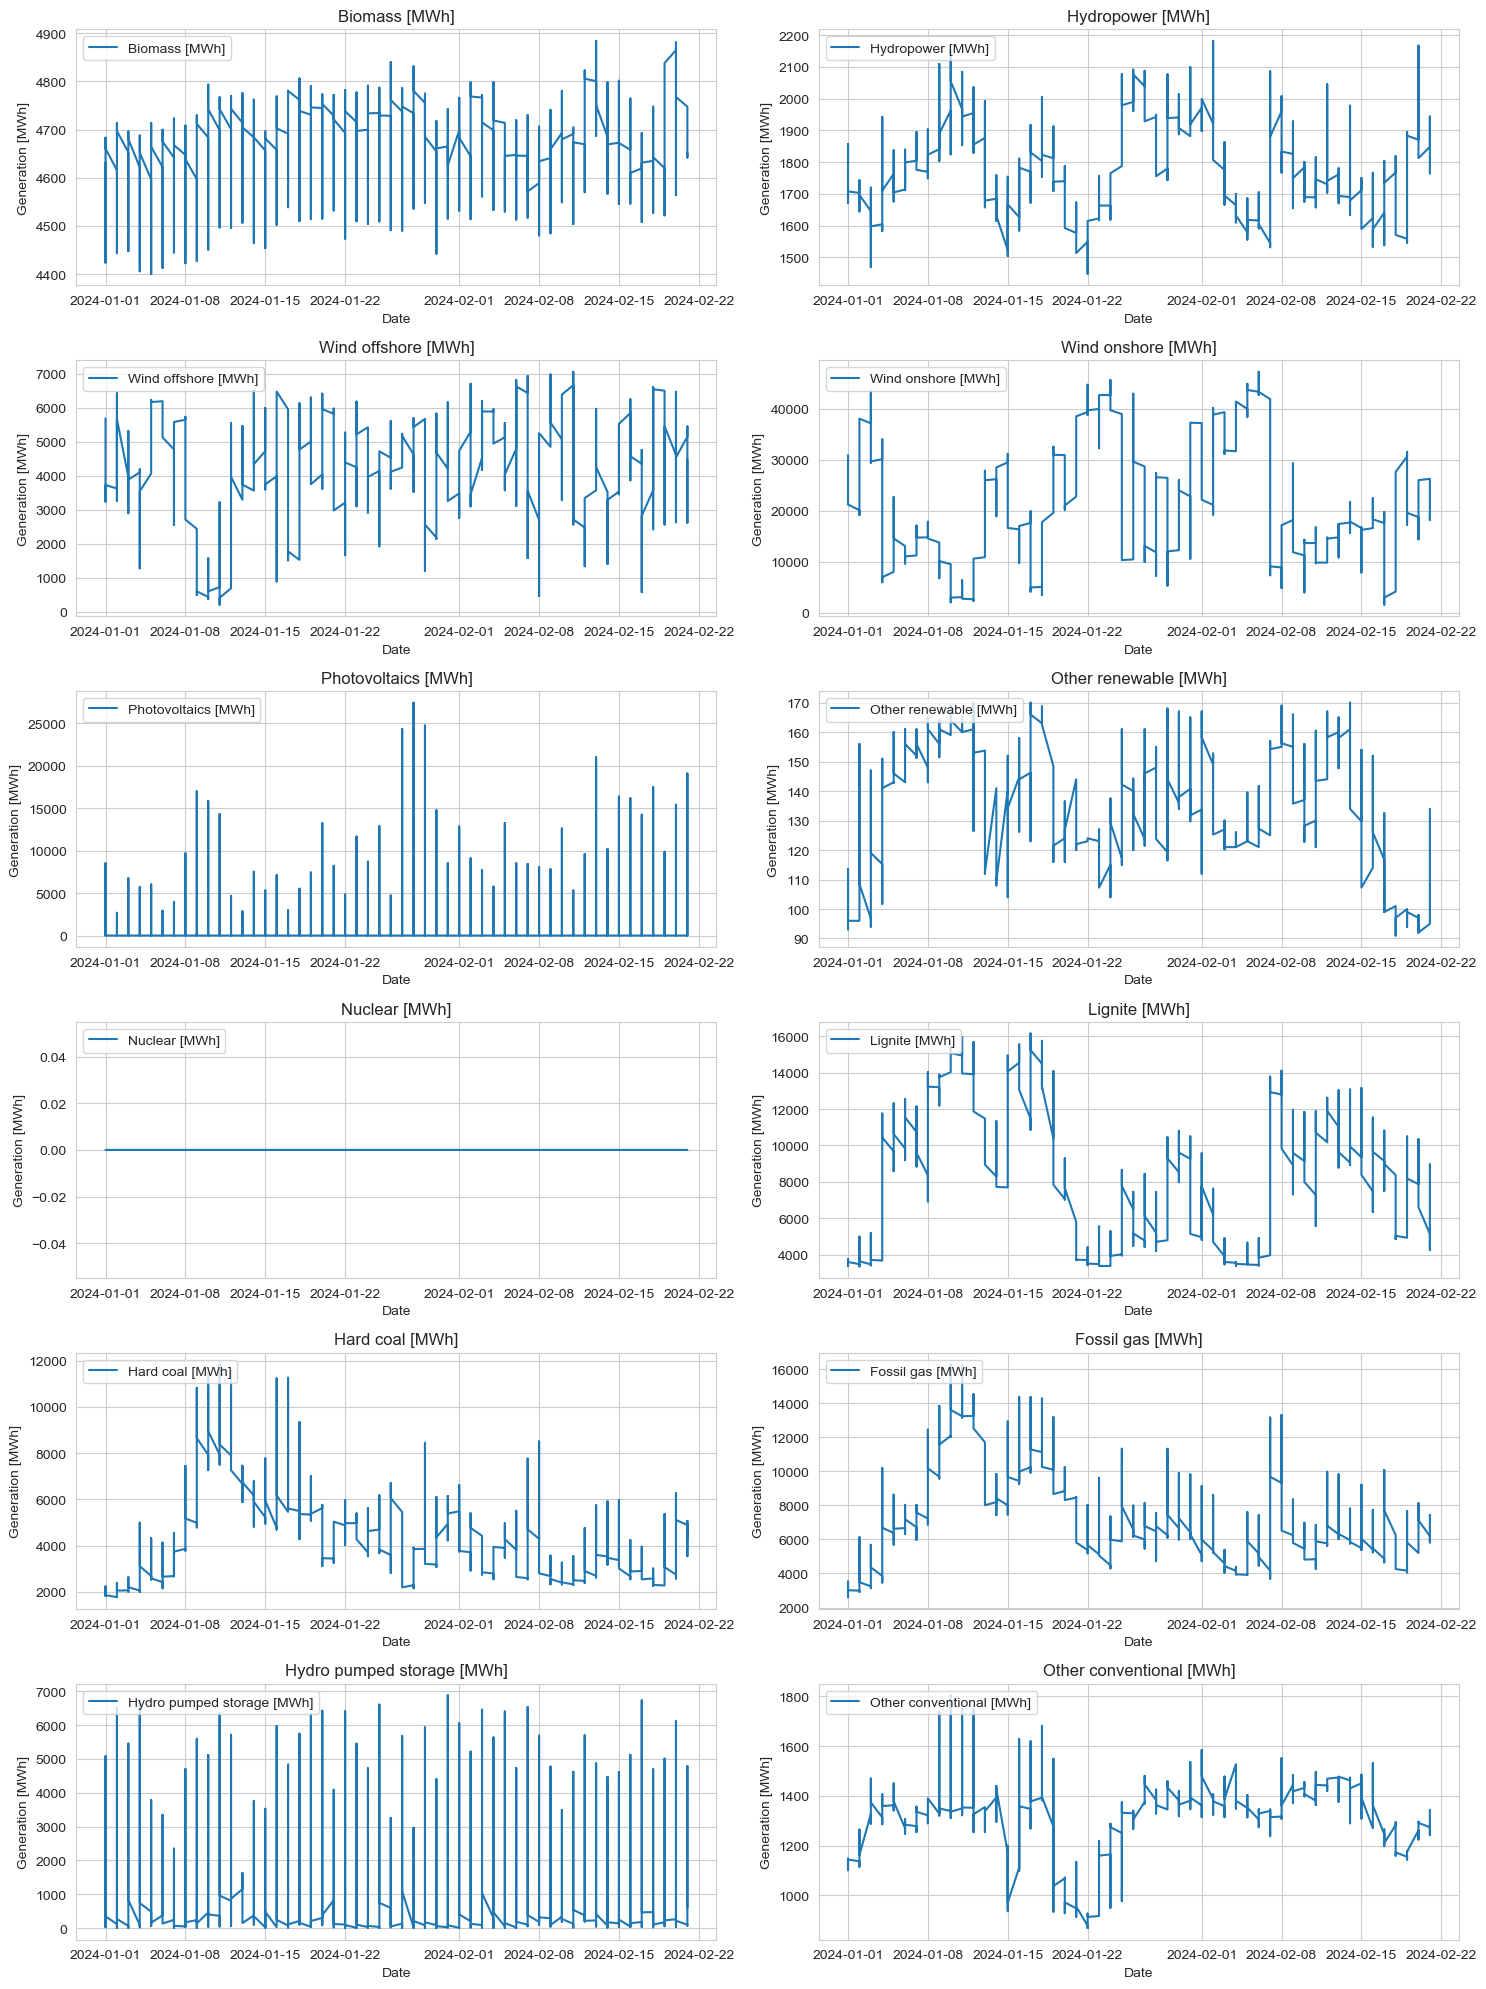

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Plotting time series for each energy generation category
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# Flattening axes array
axes = axes.flatten()

# Plotting each energy generation category
for i, col in enumerate(energy_columns):
    axes[i].plot(data_filled['Date'], data_filled[col], label=col, color='tab:blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Generation [MWh]')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()


### Correlation heatmap to understand relationships between different energy types


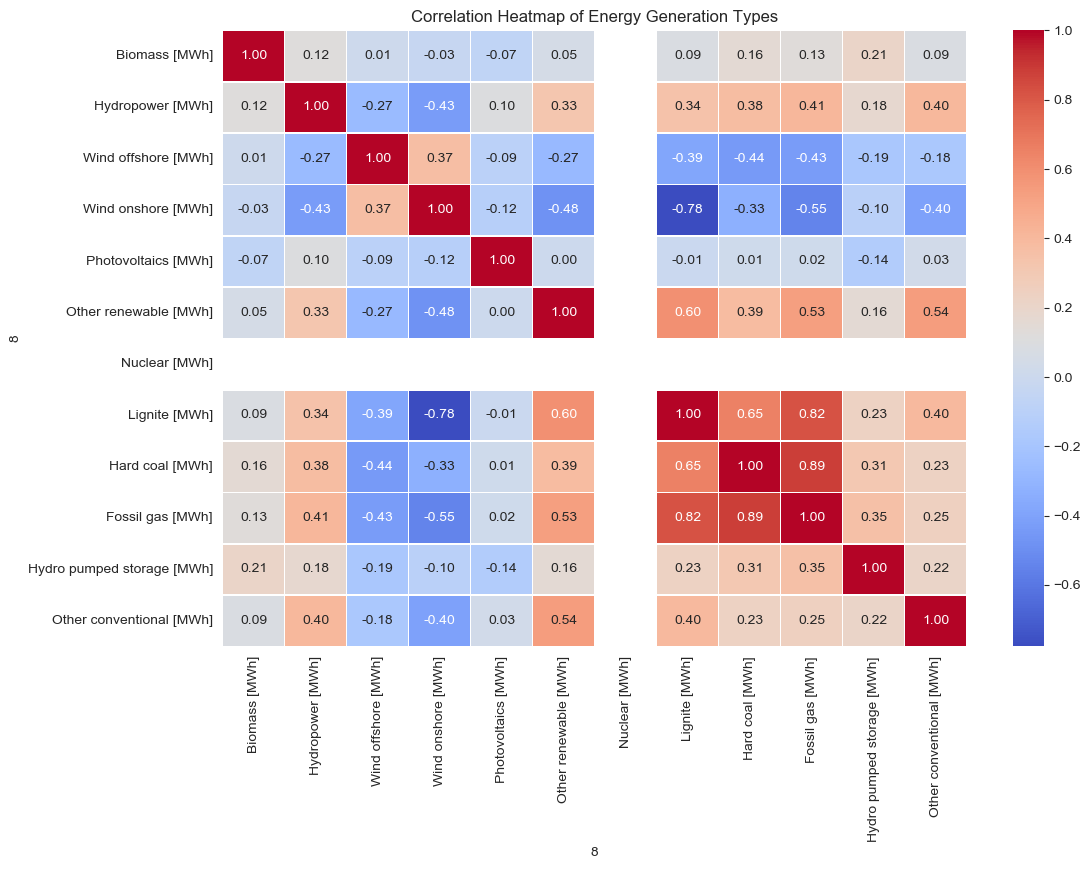

In [28]:
# Calculating the correlation matrix
corr_matrix = data_filled[energy_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Energy Generation Types')
plt.show()


In [44]:
data_filled['Month'].unique()

array(['January', 'February'], dtype=object)

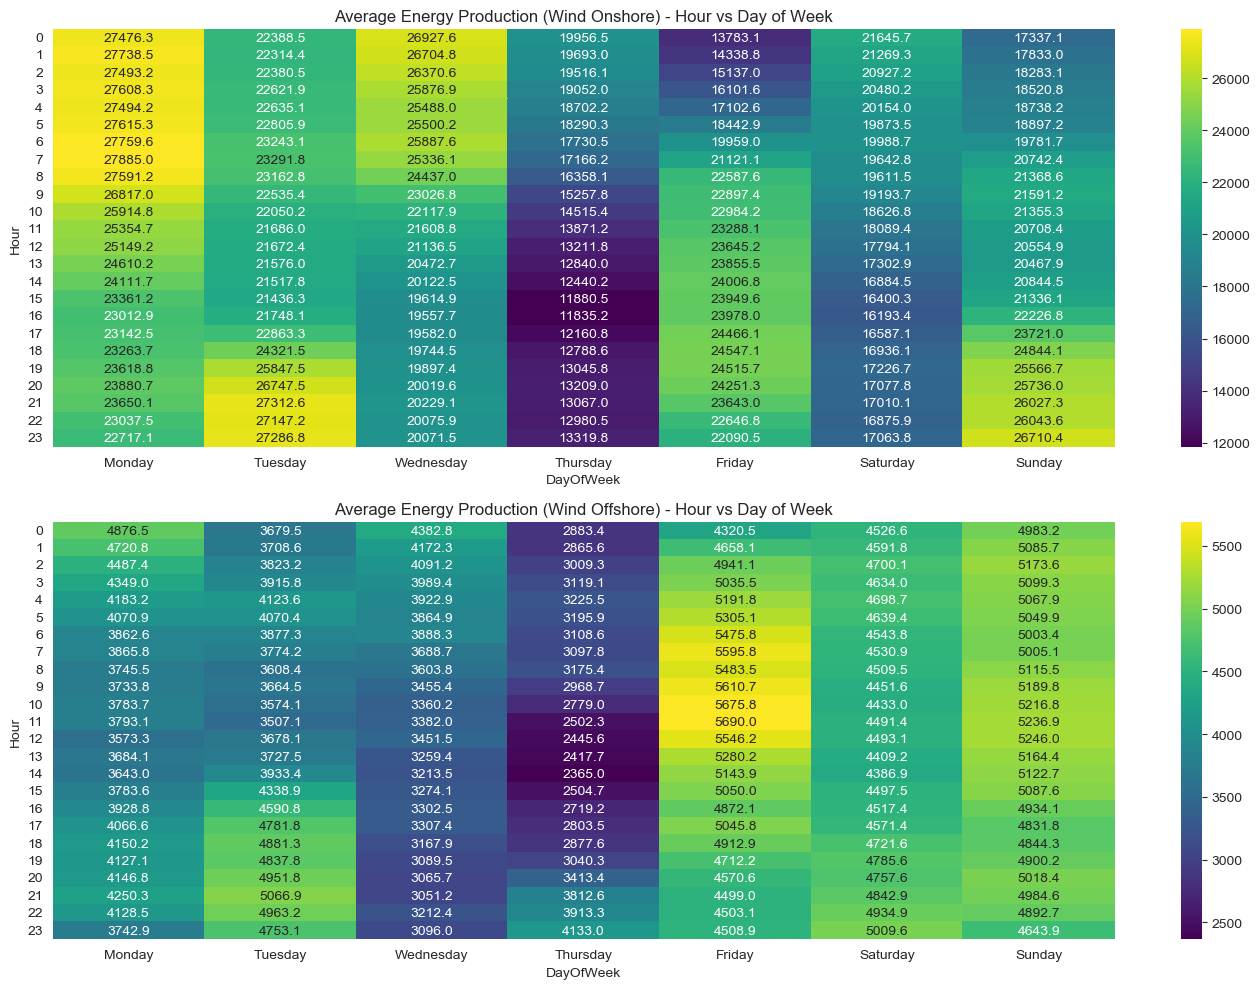

In [38]:

# Extracting the day of week and hour from the 'Start' column
data_filled['DayOfWeek'] = data_filled['Date'].dt.day_name()
data_filled['Hour'] = data_filled['Start'].apply(lambda x: x.hour)
data_filled['Month'] = data_filled['Date'].dt.month_name()

# Creating pivot tables for heatmap
pivot_onshore = data_filled.pivot_table(values='Wind onshore [MWh]', index='Hour', columns='DayOfWeek', 
                                        aggfunc=np.mean, dropna=True)
pivot_offshore = data_filled.pivot_table(values='Wind offshore [MWh]', index='Hour', columns='DayOfWeek', 
                                         aggfunc=np.mean, dropna=True)



# Ordering the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_onshore = pivot_onshore[day_order]
pivot_offshore = pivot_offshore[day_order]

# Plotting the heatmaps
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
sns.heatmap(pivot_onshore, cmap="viridis", annot=True, fmt=".1f")
plt.title('Average Energy Production (Wind Onshore) - Hour vs Day of Week')

plt.subplot(2, 1, 2)
sns.heatmap(pivot_offshore, cmap="viridis", annot=True, fmt=".1f")
plt.title('Average Energy Production (Wind Offshore) - Hour vs Day of Week')

plt.tight_layout()
plt.show()


In [37]:
data_filled

8,Date,Start,End,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh],DayOfWeek,Hour
0,2024-01-01,00:00:00,01:00:00,4631.75,1796.500,5680.500,29521.50,0.0,93.00,0.0,3391.750,1860.750,2731.25,620.750,1134.000,Monday,0
1,2024-01-01,01:00:00,02:00:00,4571.25,1798.500,5343.250,29614.75,0.0,93.00,0.0,3372.750,1854.750,2662.00,405.500,1119.250,Monday,1
2,2024-01-01,02:00:00,03:00:00,4528.75,1821.750,5187.250,29643.00,0.0,93.00,0.0,3373.500,1828.750,2689.50,374.750,1111.750,Monday,2
3,2024-01-01,03:00:00,04:00:00,4467.00,1828.750,4673.500,29215.25,0.0,93.00,0.0,3393.000,1817.500,2711.50,331.750,1122.250,Monday,3
4,2024-01-01,04:00:00,05:00:00,4427.50,1856.250,4438.500,29284.00,0.0,94.75,0.0,3393.750,1832.750,2694.25,178.750,1113.000,Monday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2024-02-21,19:00:00,20:00:00,4651.50,1763.625,4462.625,19215.50,0.0,134.00,0.0,8977.875,4373.625,7388.25,603.375,1343.625,Wednesday,19
1244,2024-02-21,20:00:00,21:00:00,4651.50,1763.625,4462.625,19215.50,0.0,134.00,0.0,8977.875,4373.625,7388.25,603.375,1343.625,Wednesday,20
1245,2024-02-21,21:00:00,22:00:00,4651.50,1763.625,4462.625,19215.50,0.0,134.00,0.0,8977.875,4373.625,7388.25,603.375,1343.625,Wednesday,21
1246,2024-02-21,22:00:00,23:00:00,4651.50,1763.625,4462.625,19215.50,0.0,134.00,0.0,8977.875,4373.625,7388.25,603.375,1343.625,Wednesday,22


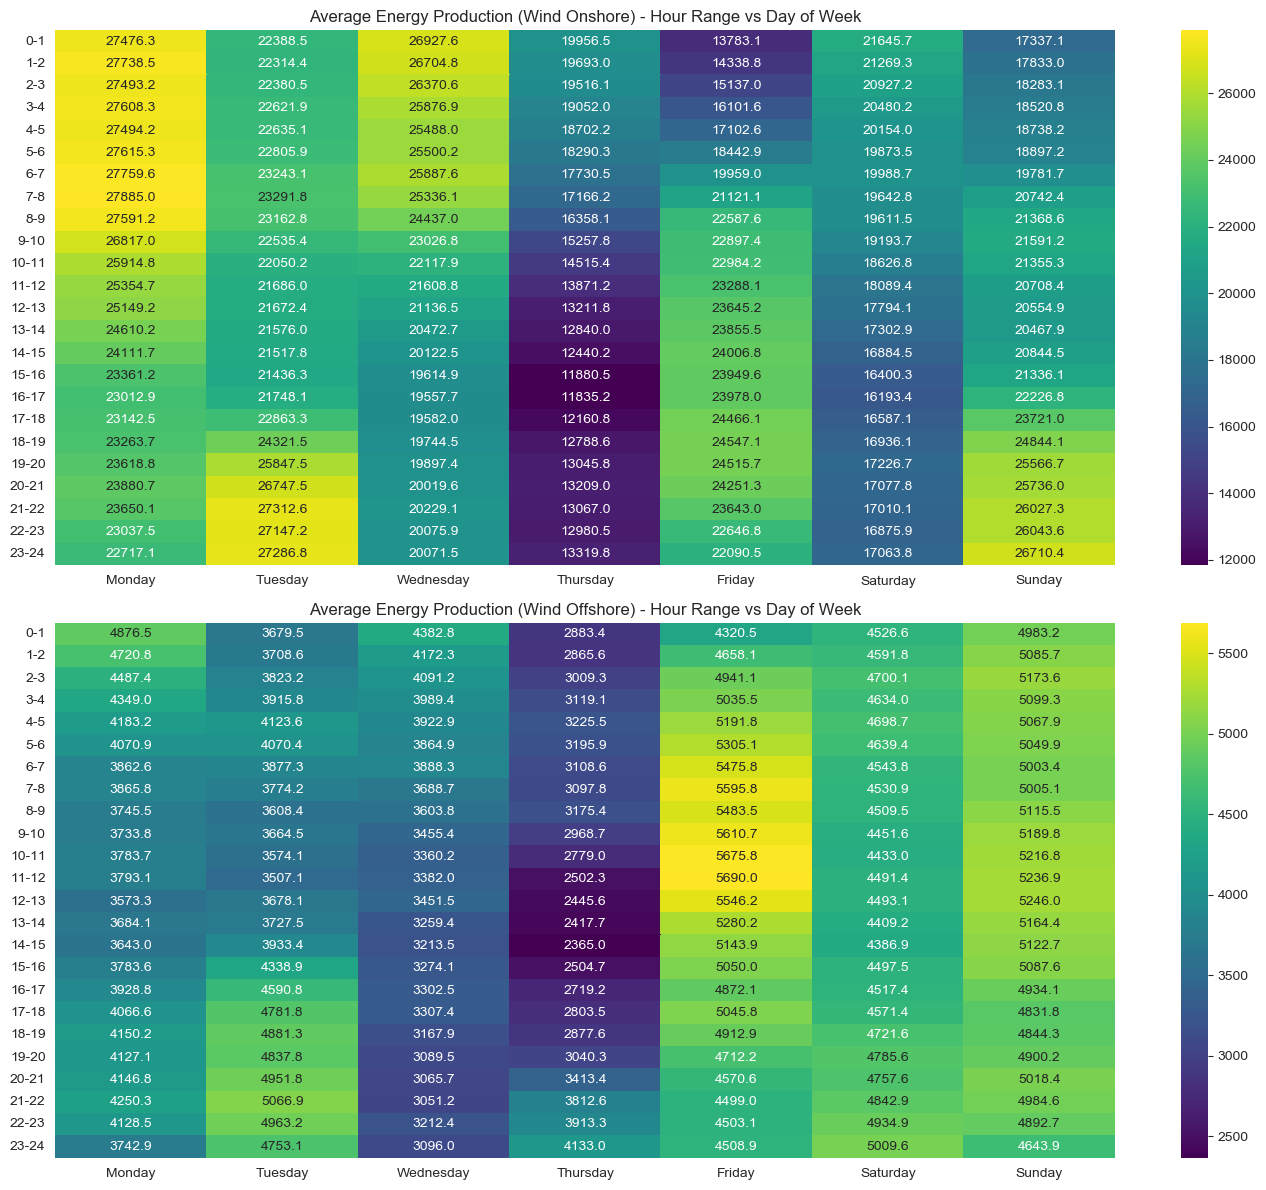

In [34]:
# Adjusting the heatmaps to display hour ranges (e.g., "1-2" for hours between 1 and 2)

# Creating hour ranges for the y-axis labels
hour_ranges = [f"{h}-{h+1}" for h in range(24)]

# Creating a new DataFrame with hour ranges as the index
pivot_onshore_hourly = pd.DataFrame(index=hour_ranges, columns=day_order)
pivot_offshore_hourly = pd.DataFrame(index=hour_ranges, columns=day_order)

# Populating the new DataFrames with average values from the pivot tables
for i, hour_range in enumerate(hour_ranges):
    pivot_onshore_hourly.loc[hour_range] = pivot_onshore.iloc[i]
    pivot_offshore_hourly.loc[hour_range] = pivot_offshore.iloc[i]

# Ensuring the data in the new pivot tables is numeric for proper visualization
pivot_onshore_hourly = pivot_onshore_hourly.apply(pd.to_numeric, errors='coerce')
pivot_offshore_hourly = pivot_offshore_hourly.apply(pd.to_numeric, errors='coerce')

# Replotting the heatmaps with numeric data and formatted hour ranges
plt.figure(figsize=(14, 12))

# Wind Onshore
plt.subplot(2, 1, 1)
sns.heatmap(pivot_onshore_hourly, cmap="viridis", annot=True, fmt=".1f")
plt.title('Average Energy Production (Wind Onshore) - Hour Range vs Day of Week')

# Wind Offshore
plt.subplot(2, 1, 2)
sns.heatmap(pivot_offshore_hourly, cmap="viridis", annot=True, fmt=".1f")
plt.title('Average Energy Production (Wind Offshore) - Hour Range vs Day of Week')

plt.tight_layout()
plt.show()
